In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


DECISION TREE CLASSIFICATION:

In [2]:
data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING/salaries.csv")

In [3]:
data

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [4]:
data.isna().sum()

,0
company,0
job,0
degree,0
salary_more_then_100k,0


In [5]:
data.dtypes

,0
company,object
job,object
degree,object
salary_more_then_100k,int64


In [6]:
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()

In [7]:
data['company']=le1.fit_transform(data['company'])
data['job']=le2.fit_transform(data['job'])
data['degree']=le3.fit_transform(data['degree'])


In [8]:
data

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [9]:
x=data.drop('salary_more_then_100k', axis=1)
y=data['salary_more_then_100k']

model=DecisionTreeClassifier(max_depth=3)

In [10]:
print(x)

    company  job  degree
0         2    2       0
1         2    2       1
2         2    0       0
3         2    0       1
4         2    1       0
5         2    1       1
6         0    2       1
7         0    1       0
8         0    0       0
9         0    0       1
10        1    2       0
11        1    2       1
12        1    0       0
13        1    0       1
14        1    1       0
15        1    1       1


In [11]:
data

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [12]:
model.fit(x,y)

DecisionTreeClassifier(max_depth=3)

In [13]:
model.score(x,y)

0.9375

In [14]:
ypred=model.predict(x)
pd.DataFrame({'true y vale':y,'predicted y value':ypred})

,true y vale,predicted y value
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
5,1,0
6,0,0
7,0,0
8,0,0
9,1,1


In [15]:
model.predict([[1,1,1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [16]:
from sklearn import tree

In [17]:
print(tree.export_text(model))

|--- feature_0 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1
|   |--- feature_1 >  0.50
|   |   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_0 <= 1.50
|   |   |--- class: 1
|   |--- feature_0 >  1.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 0



[Text(0.5, 0.875, 'company <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.3, 0.625, 'job <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4, 0.75, 'True  '),
 Text(0.2, 0.375, 'degree <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7, 0.625, 'company <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.6, 0.75, '  False'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.8, 0.375, 'job <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.9, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]')]

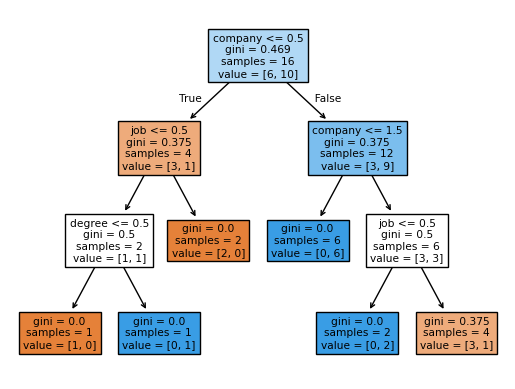

In [18]:
tree.plot_tree(model, feature_names=x.columns, filled=True)

In [19]:
company = input('name of company')
company = le1.transform([company])

job = input('name of job')
job = le2.transform([job])

degree = input('your degree')
degree = le3.transform([degree])

name of companygoogle
name of jobsales executive
your degreebachelors


In [20]:
degree[0]
model.predict([[company[0],job[0],degree[0]]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [21]:
# DECISION TREE REGRESSION:

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [23]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING/diamonds.csv')

In [24]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [25]:
data=data.drop('Unnamed: 0', axis=1)

In [26]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [27]:
data.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [28]:
cutdict={'Fair':1,'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
colordict={'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1}
claritydict={'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}


In [29]:
data['cut']=data['cut'].map(cutdict)
data['color']=data['color'].map(colordict)
data['clarity']=data['clarity'].map(claritydict)

In [30]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [31]:
data.dtypes

,0
carat,float64
cut,int64
color,int64
clarity,int64
depth,float64
table,float64
price,int64
x,float64
y,float64
z,float64


In [32]:
data.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [33]:
x=data.drop('price', axis=1)
y=data['price']

xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.3, random_state=3)
model=DecisionTreeRegressor()
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain)

0.9999946915233997

In [34]:
model.score(xtest,ytest)

0.9651499782329424

In [35]:
scaler=MinMaxScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [36]:
model1=DecisionTreeRegressor()
model1.fit(xtrain,ytrain)
model1.score(xtest,ytest)

0.9645441150687768